# R1
Segmenta ou filtra os círculos maiores da imagem baseado em cores ou canais da imagem ou por exemplos com contornos e produz output visual. Exibe a área e o centro de massa da imagem. Use circulo.png

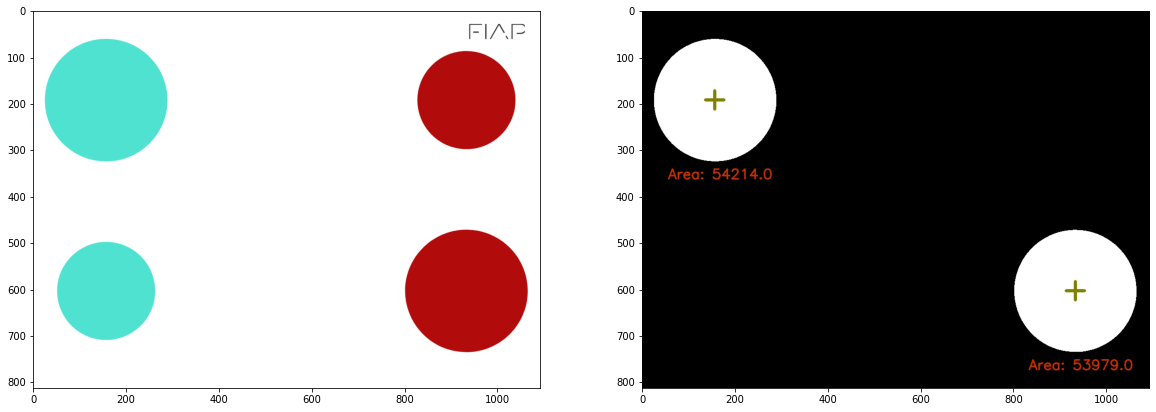

In [183]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

def segmentAndCalculate(mask):
  contour, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) 

  big = None
  small = None
  small_area = cv2.contourArea(contour[0])
  big_area = 0

  for c in contour:
    area = cv2.contourArea(c)
    if area <= small_area:
      small_area = area
      small = c

  for c in contour:
      area = cv2.contourArea(c)
      if area > big_area:
          big_area = area
          big = c
  mask = cv2.fillPoly(mask_rgb, [small], 0)

  hough_mask = mask.copy()
  
  M = cv2.moments(big)
  if M["m00"] != 0:
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

  size = 20
  color = (128,128,0)
  cv2.line(mask,(cx - size,cy),(cx + size,cy),color,5)
  cv2.line(mask,(cx,cy - size),(cx, cy + size),color,5)

  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(mask, f'Area: {str(big_area)}', (cx-100,cy+170), font,1,(200,50,0),2,cv2.LINE_AA) 

  return mask, hough_mask, cx, cy

img = cv2.imread("circulos.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

red_lower_hsv = np.array([0, 200, 85])  
red_upper_hsv = np.array([15, 255, 255])

blue_lower_hsv = np.array([80, 100, 100]) 
blue_upper_hsv = np.array([100, 210, 255])

red_mask = cv2.inRange(img_hsv, red_lower_hsv, red_upper_hsv)
blue_mask = cv2.inRange(img_hsv, blue_lower_hsv, blue_upper_hsv)

mask_red,hough_mask_red, cx_red, cy_red = segmentAndCalculate(red_mask)
mask_blue, hough_mask_blue, cx_blue, cy_blue = segmentAndCalculate(blue_mask)

mask = cv2.bitwise_or(mask_red, mask_blue) 

hough_mask = cv2.bitwise_or(hough_mask_red, hough_mask_blue)

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb, vmin=0, vmax=255); 
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

# R2
Faz o R1, Detecta o contorno dos círculos com a transformada de hough, traça uma reta entre os dois centros dos círculos e calcula o ângulo de inclinação da reta em relação o plano horizontal e exibe esse resultado.


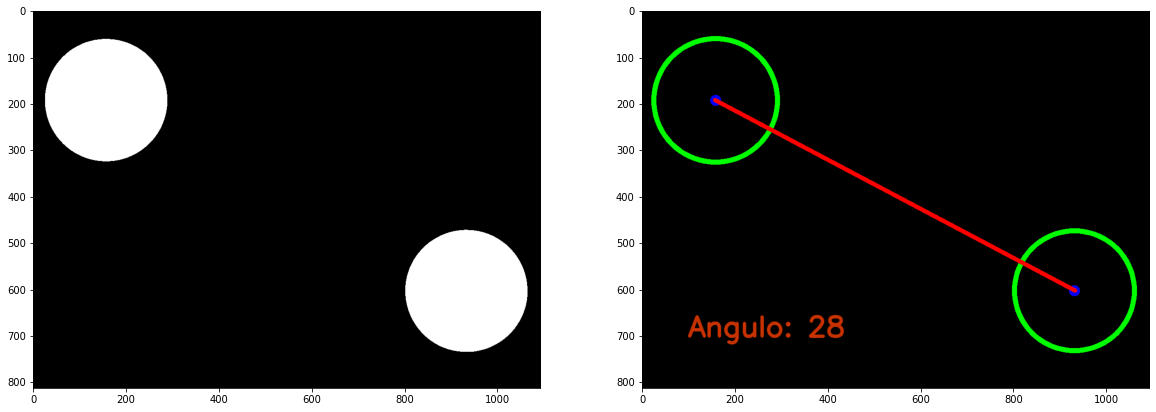

In [184]:
img_gray = cv2.cvtColor(hough_mask, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img_gray,50,150)
circles = cv2.HoughCircles(img_gray,cv2.HOUGH_GRADIENT,1,60,param1=30,param2=20,minRadius=1,maxRadius=0)
bordas_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
output = bordas_rgb


if circles is not None:        
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(output,(i[0],i[1]),i[2],(0,255,0),10)
        cv2.circle(output,(i[0],i[1]),2,(0,0,255),20)

cv2.line(output, (cx_red, cy_red),(cx_blue, cy_blue), (255, 0, 0), thickness=8, lineType=2)   

ang = round(math.degrees(math.atan2(cy_red-cy_blue, cx_red-cx_blue))) 

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(output, f'Angulo: {str(ang)}', (100,700), font,2,(200,50,0),5,cv2.LINE_AA) 

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(hough_mask, vmin=0, vmax=255); 
plt.subplot(1, 2, 2)
plt.imshow(output, cmap="Greys_r", vmin=0, vmax=255)
plt.show()